In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

# Fraud_ckeck

In [121]:
data=pd.read_csv('C:/Users/kishore/Downloads/Fraud_check (1).csv')

In [122]:
data=data.rename(columns={'Marital.Status':'Martial_status','Taxable.Income':'Taxable_income','City.Population':'city_population','Work.Experience':'work_experience'})

In [123]:
data.head

<bound method NDFrame.head of     Undergrad Martial_status  Taxable_income  city_population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     work_experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..             

In [124]:
data.columns

Index(['Undergrad', 'Martial_status', 'Taxable_income', 'city_population',
       'work_experience', 'Urban'],
      dtype='object')

In [125]:
data

,Undergrad,Martial_status,Taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [126]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 

In [127]:
label_encoder = preprocessing.LabelEncoder()
data['Martial_status']= label_encoder.fit_transform(data['Martial_status']) 

In [128]:
label_encoder = preprocessing.LabelEncoder()
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [129]:
colnames = list(data.columns)

In [151]:
target = colnames[0]

In [152]:
target

'Undergrad'

In [153]:
predictors = colnames[2:5]


In [154]:
predictors

['Taxable_income', 'city_population', 'work_experience']

In [155]:
X = data[predictors]
y= data[target]

In [156]:
X

,Taxable_income,city_population,work_experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28
...,...,...,...
595,76340,39492,7
596,69967,55369,2
597,47334,154058,0
598,98592,180083,17


In [157]:
y

0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int32

In [158]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [159]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [160]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

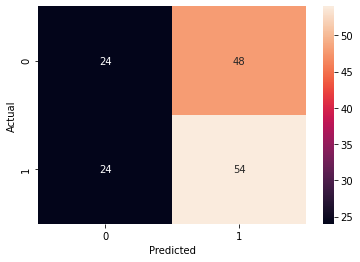

In [161]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [162]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()


Accuracy:  0.52


In [163]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print (X_test) #test dataset (without the actual outcome)
print (y_pred) #predicted values

     Taxable_income  city_population  work_experience
434           22159            87188               19
122           21016           140762               26
224           86784            55717               25
479           58403            68995               21
205           14300           131906               20
..              ...              ...              ...
598           98592           180083               17
89            26741           176050               20
382           68696           139269               29
408           33579            77059               22
157           48738           115631                5

[150 rows x 3 columns]
[1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1
 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1
 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1
 0 1]


In [164]:
prediction = clf.predict([[22159,87188,19]])
print ('Predicted Result: ', prediction)

Predicted Result:  [1]


# Company_data

In [169]:
data=pd.read_csv('C:/Users/kishore/Downloads/Company_Data (1).csv')

In [170]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [171]:
data.head

<bound method NDFrame.head of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Educ

In [172]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [173]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc']) 

In [174]:
colnames = list(data.columns)

In [175]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,2,55,11,No,Yes
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes
398,5.94,100,79,7,284,95,0,50,12,Yes,Yes


In [176]:
target=colnames[6]

In [177]:
target

'ShelveLoc'

In [178]:
predictors = colnames[:6]

In [179]:
predictors

['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price']

In [180]:
X = data[predictors]
y= data[target]

In [181]:
X

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [182]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [184]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [185]:
y_pred

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1,
       0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

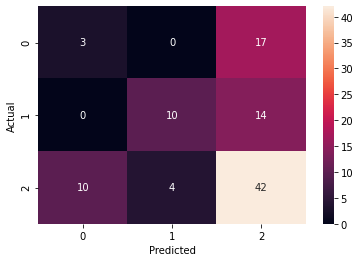

In [186]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [187]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.55


In [188]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print (X_test) #test dataset (without the actual outcome)
print (y_pred) #predicted values

     Sales  CompPrice  Income  Advertising  Population  Price
132   9.54        125      87            9         232    136
309  11.18        131     111           13          33     80
341   7.38         98     120            0         268     93
196   4.10        130      28            6         410    133
246   6.90        120      56           20         266     90
..     ...        ...     ...          ...         ...    ...
146   3.90        114      83            0         412    131
135   6.44         96      94           14         384    120
390   5.47        108      75            9          61    111
264   6.95        128      29            5         324    159
364  10.50        122      21           16         488    131

[100 rows x 6 columns]
[2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2
 2 2 2 0 2 2 1 0 0 2 2 1 2 2 2 1 1 0 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 1 2 1 2 2 2 0 2 1 2 0 1 1 2 2 2 2 2 2 2 2 1 2]


In [189]:
prediction = clf.predict([[9.54,125,87,9,232,136]])
print ('Predicted Result: ', prediction)

Predicted Result:  [2]
